<a href="https://colab.research.google.com/github/sh01k/teaching/blob/master/binaural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget -O test.wav "https://drive.google.com/uc?export=download&id=15VyUDMAXYF_7crH7TfjMysG35S4OuKDt"
filename = "./test.wav"
!wget -O hrir.zip "http://audiogroup.web.th-koeln.de/FILES/NFHRIR_CIRC360_SOFA.zip"
!unzip "./hrir.zip"
!pip install python-sofa

--2020-11-09 07:12:26--  http://audiogroup.web.th-koeln.de/FILES/NFHRIR_CIRC360_SOFA.zip
Resolving audiogroup.web.th-koeln.de (audiogroup.web.th-koeln.de)... 139.6.10.105
Connecting to audiogroup.web.th-koeln.de (audiogroup.web.th-koeln.de)|139.6.10.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2283100 (2.2M) [application/zip]
Saving to: ‘hrir.zip’

hrir.zip            100%[===================>]   2.18M   596KB/s    in 3.7s    

2020-11-09 07:12:31 (596 KB/s) - ‘hrir.zip’ saved [2283100/2283100]

Archive:  ./hrir.zip
replace HRIR_CIRC360_NF025.sofa? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HRIR_CIRC360_NF025.sofa  
replace HRIR_CIRC360_NF050.sofa? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HRIR_CIRC360_NF050.sofa  
replace HRIR_CIRC360_NF075.sofa? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HRIR_CIRC360_NF075.sofa  
replace HRIR_CIRC360_NF100.sofa? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HRIR_CIRC360_NF100.sofa 

In [95]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import wave
import sofa
import IPython.display

HRTF_path = "./HRIR_CIRC360_NF150.sofa"
HRTF = sofa.Database.open(HRTF_path)
HRTF.Metadata.dump()

#FFT parameters
fftlen = 512
fftshift = int(fftlen/2)

pos_sources = HRTF.Source.Position.get_values(system="cartesian")

fs_hrir = HRTF.Data.SamplingRate.get_values()[0]
tlen_hrir = HRTF.Dimensions.N

hrirL = np.zeros([HRTF.Dimensions.M,HRTF.Dimensions.N])
hrirR = np.zeros([HRTF.Dimensions.M,HRTF.Dimensions.N])
hrtfL = np.zeros([HRTF.Dimensions.M,fftlen])
hrtfR = np.zeros([HRTF.Dimensions.M,fftlen])

for m in np.arange(HRTF.Dimensions.M):
  hrirL[m,:] = HRTF.Data.IR.get_values(indices={"M":m, "R":0, "E":0})
  hrirR[m,:] = HRTF.Data.IR.get_values(indices={"M":m, "R":1, "E":0})
  hrtfL[m,:] = np.fft.fft(hrirL[m,:], n=fftlen)
  hrtfR[m,:] = np.fft.fft(hrirR[m,:], n=fftlen)

HRTF.close()

APIName: ARI SOFA API for Matlab/Octave
APIVersion: 1.0.3
ApplicationName: 
ApplicationVersion: 
Author: Johannes M. Arend
AuthorContact: Johannes.Arend@th-koeln.de
Comment: KU100 nearfield HRIRs
Conventions: SOFA
DataType: FIR
DatabaseName: THK
DateCreated: 2016-05-25 13:07:04
DateModified: 2018-05-04 14:41:22
History: Converted from the miro file format
License: CC 3.0 BY-SA
ListenerDescription: Neumann KU100
ListenerShortName: HRIR_CIRC360_NF150
Organization: Technische Hochschule K�ln, Germany
Origin: http://audiogroup.web.th-koeln.de
ReceiverDescription: Neumann KU100; Internal RME Fireface UFX Preamps
References: Arend, J.M., Neidhardt, A., P�rschmann, C. (2016). Measurement and Perceptual Evaluation of a Spherical Near-Field HRTF Set. In: Proceedings of the 29th VDT International Convention
RoomDescription: THK ZW8-4 (Anechoic Chamber)
RoomType: free field
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVersion: 1.0
SourceDescription: Geithain RL906
Title: HRTF
Version: 1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


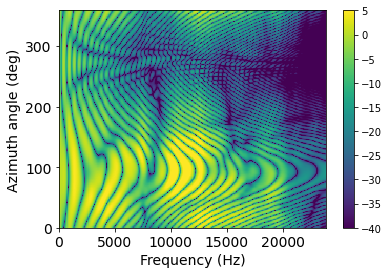

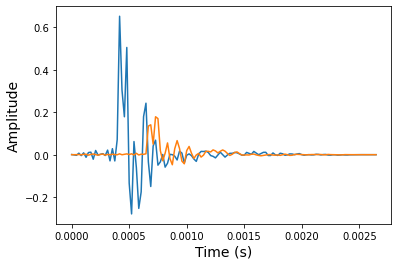

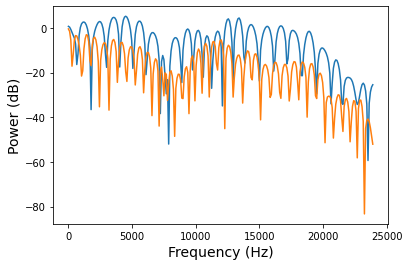

In [113]:
t = np.arange(tlen_hrir)/fs_hrir
freq = np.arange(fftshift)/fftshift*fs_hrir/2
ang = np.arange(360)
ff,aa = np.meshgrid(freq,ang)

# plot HRTF data
fig = plt.figure()
ax = plt.axes()
color = plt.pcolor(ff,aa,20*np.log10(np.abs(hrtfL[:,:fftshift])), vmin=-40, vmax=5)
cbar=plt.colorbar(color)
plt.xlabel('Frequency (Hz)', fontsize = 14)
plt.ylabel('Azimuth angle (deg)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.show()

m = 30

fig = plt.figure()
ax = plt.axes()
plt.plot(t,hrirL[m,:],t,hrirR[m,:])
plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(freq, 20*np.log10(np.abs(hrtfL[m,:fftshift])),freq, 20*np.log10(np.abs(hrtfR[m,:fftshift])))
plt.xlabel('Frequency (Hz)', fontsize = 14)
plt.ylabel('Power (dB)', fontsize = 14)
plt.show()

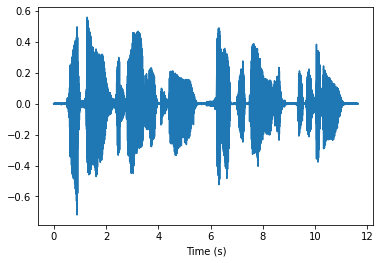

In [96]:
# Open audio file
wf = wave.open(filename, mode='rb')

# Sampling frequency
fs_sig = int(wf.getframerate())

# Samples
nsamples = wf.getnframes()

# Read to buffer
buf = wf.readframes(-1)
if wf.getsampwidth() == 2:
  data = np.frombuffer(buf, dtype='int16')/(2**(16-1))
elif wf.getsampwidth() == 4:
  data = np.frombuffer(buf, dtype='int32')/(2**(32-1))

nchannels = wf.getnchannels()
if nchannels>1:
  s = data[:: nchannels]
else:
  s = data

t = np.arange(nsamples*fs_hrir/fs_sig)/fs_sig

s = signal.resample(s,int(nsamples*fs_hrir/fs_sig))

# Close audio file
wf.close()

# Plot clean speech
plt.plot(t,s)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(s, rate=fs_hrir)

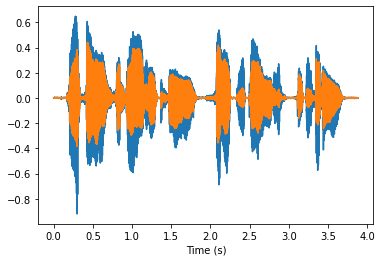

In [118]:
# index of azimuth angle
m = 30

# generate binaural signals
sigL = np.convolve(s, hrirL[m,:])
sigR = np.convolve(s, hrirR[m,:])

sig = np.array([sigL, sigR])

# draw plots
t = np.arange(len(sigL))/fs_hrir
plt.plot(t, sig.T)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(sig, rate=fs_hrir)